# House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015

Importing libraries

In [2]:
#importing necessary libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Loading the data



In [3]:
#loading the dataset 
df = pd.read_csv("kc_house_data.csv")
pd.set_option("display.max_columns",None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print("Number of rows :",df.shape[0])
print("Number of columns :",df.shape[1])

Number of rows : 21613
Number of columns : 21


Data preprocessing

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df['bedrooms'] = df['bedrooms'].round().astype(int)
df['floors'] = df['floors'].astype(int)

In [7]:
#handling missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
#checking for duplicate values in lattitude and longitude
duplicates = df.duplicated(subset=["lat","long"],keep = False).sum()
print("Number of duplicate rows :",duplicates)
duplicate_rows = df[df.duplicated(keep=False,subset=["lat","long"])]
duplicate_rows[["id","lat","long"]].head()

Number of duplicate rows : 1508


,id,lat,long
31,2426039314,47.7274,-122.357
55,9822700295,47.6597,-122.290
56,9478500640,47.3663,-122.114
63,9528102996,47.6765,-122.320
73,5416510140,47.3608,-122.036


In [9]:
#randomizing the rows
df = df.sample(frac = 1,random_state=5) 
df.drop_duplicates(subset=["lat","long"],inplace=True,keep='first')

In [10]:
#checking for duplicate values in id 
dup_id = df.duplicated(subset=["id"],keep = False ).sum()
print("Number of duplicate id rows :",dup_id)

Number of duplicate id rows : 0


In [11]:
#removing irrelevent columns - zipcode 
df['zipcode'].unique()
#df = df.drop(["zipcode"],axis =1)

array([98042, 98178, 98126, 98105, 98034, 98006, 98008, 98052, 98055,
       98001, 98103, 98019, 98125, 98045, 98146, 98122, 98059, 98023,
       98029, 98028, 98118, 98038, 98004, 98065, 98075, 98031, 98033,
       98106, 98117, 98053, 98005, 98168, 98030, 98115, 98133, 98040,
       98136, 98032, 98077, 98188, 98108, 98199, 98116, 98144, 98014,
       98166, 98155, 98022, 98072, 98039, 98107, 98007, 98119, 98092,
       98056, 98198, 98011, 98074, 98027, 98002, 98102, 98177, 98058,
       98112, 98024, 98109, 98070, 98003, 98010, 98148], dtype=int64)

Exploratory Data Analysis (EDA)

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.083200e+04,2.083200e+04,20832.000000,20832.000000,20832.000000,2.083200e+04,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000,20832.000000
mean,4.576510e+09,5.427702e+05,3.379656,2.117560,2092.566676,1.542482e+04,1.438412,0.007728,0.238095,3.414843,7.663354,1796.748608,295.818068,1970.794163,85.650778,98077.584917,47.559296,-122.212939,1994.886953,13005.356039
std,2.876028e+09,3.706799e+05,0.930402,0.771962,923.589882,4.209555e+04,0.544720,0.087574,0.772065,0.652206,1.181891,832.987922,445.904704,29.229920,404.508249,53.600959,0.138977,0.140995,687.760550,27731.143772
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.122059e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.103500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.468800,-122.327000,1490.000000,5160.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1930.000000,7.680000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571100,-122.228000,1850.000000,7676.000000
75%,7.305301e+09,6.499500e+05,4.000000,2.500000,2560.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,580.000000,1996.000000,0.000000,98117.000000,47.677800,-122.124000,2370.000000,10142.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20832 entries, 17485 to 2915
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20832 non-null  int64  
 1   date           20832 non-null  object 
 2   price          20832 non-null  float64
 3   bedrooms       20832 non-null  int32  
 4   bathrooms      20832 non-null  float64
 5   sqft_living    20832 non-null  int64  
 6   sqft_lot       20832 non-null  int64  
 7   floors         20832 non-null  int32  
 8   waterfront     20832 non-null  int64  
 9   view           20832 non-null  int64  
 10  condition      20832 non-null  int64  
 11  grade          20832 non-null  int64  
 12  sqft_above     20832 non-null  int64  
 13  sqft_basement  20832 non-null  int64  
 14  yr_built       20832 non-null  int64  
 15  yr_renovated   20832 non-null  int64  
 16  zipcode        20832 non-null  int64  
 17  lat            20832 non-null  float64
 18  long    

In [14]:
df.corr(numeric_only=True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.018246,0.001089,0.003860,-0.013489,-0.134564,0.018394,-0.002795,0.009784,-0.022913,0.006382,-0.011653,-0.006171,0.021708,-0.018231,-0.007980,-0.001902,0.018874,-0.004544,-0.141463
price,-0.018246,1.000000,0.309010,0.528690,0.703503,0.087916,0.244418,0.268311,0.398755,0.032013,0.668400,0.606196,0.324720,0.056439,0.126875,-0.050659,0.307959,0.019832,0.585240,0.080705
bedrooms,0.001089,0.309010,1.000000,0.519179,0.574818,0.029204,0.169512,-0.007144,0.079721,0.025712,0.360664,0.475402,0.302512,0.160795,0.017246,-0.150778,-0.004919,0.125910,0.389204,0.025936
bathrooms,0.003860,0.528690,0.519179,1.000000,0.758690,0.088341,0.523497,0.064316,0.189817,-0.126378,0.666982,0.687850,0.286490,0.505898,0.051080,-0.203546,0.026259,0.223151,0.572055,0.087810
sqft_living,-0.013489,0.703503,0.574818,0.758690,1.000000,0.170464,0.369701,0.104316,0.285712,-0.064673,0.766090,0.876113,0.434618,0.325934,0.054230,-0.196090,0.057383,0.236636,0.755090,0.180787
sqft_lot,-0.134564,0.087916,0.029204,0.088341,0.170464,1.000000,-0.003978,0.021377,0.074522,-0.011526,0.113087,0.182150,0.012806,0.056999,0.006964,-0.129145,-0.085247,0.230823,0.142176,0.717505
floors,0.018394,0.244418,0.169512,0.523497,0.369701,-0.003978,1.000000,0.020545,0.027221,-0.293050,0.478531,0.534416,-0.232583,0.571871,-0.005557,-0.104396,0.023436,0.169859,0.313655,-0.007040
waterfront,-0.002795,0.268311,-0.007144,0.064316,0.104316,0.021377,0.020545,1.000000,0.403757,0.016987,0.083578,0.072375,0.080864,-0.026403,0.094495,0.030577,-0.013950,-0.043971,0.086979,0.030409
view,0.009784,0.398755,0.079721,0.189817,0.285712,0.074522,0.027221,0.403757,1.000000,0.044844,0.251931,0.168223,0.277533,-0.051987,0.103907,0.087191,0.006065,-0.080370,0.280839,0.072123
condition,-0.022913,0.032013,0.025712,-0.126378,-0.064673,-0.011526,-0.293050,0.016987,0.044844,1.000000,-0.148824,-0.164648,0.173620,-0.361573,-0.062545,0.005814,-0.014359,-0.110317,-0.099738,-0.006303


<Axes: title={'center': 'price per grade'}, xlabel='Grade', ylabel='Average Price (USD per million)'>

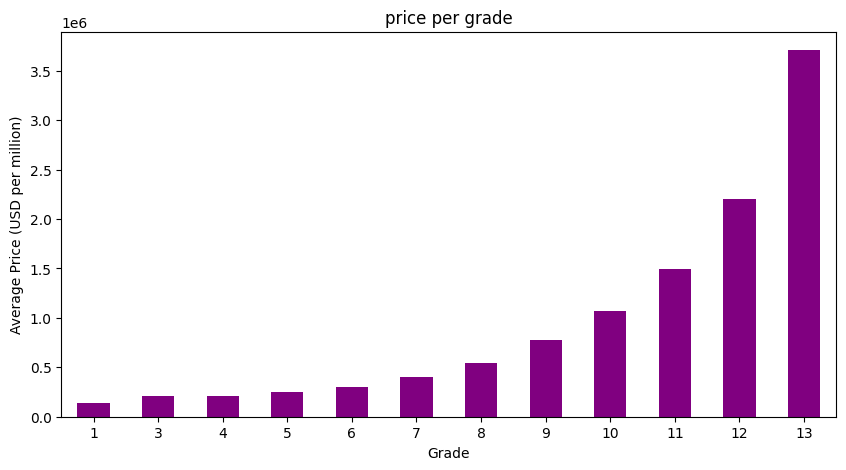

In [15]:
df.groupby('grade')['price'].mean().plot(kind = "bar",
                                         xlabel="Grade",
                                         ylabel="Average Price (USD per million)",
                                         figsize=(10,5),
                                         color = 'purple',
                                         title = "price per grade",
                                         rot = 0)

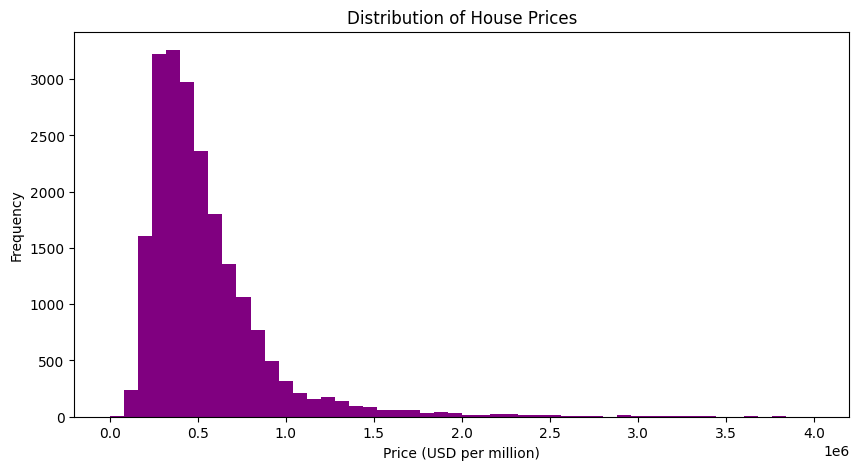

In [16]:
df['price'].plot(
    kind='hist', 
    bins=50,
    figsize=(10, 5), 
    title='Distribution of House Prices', 
    ylabel='Frequency', 
    xlabel='Price (USD per million)',
    range=(0, 4e6),
    color='purple'
)

plt.show()

<Axes: title={'center': 'Average price over an Area'}, xlabel='zipcode', ylabel='Average Price (USD per million)'>

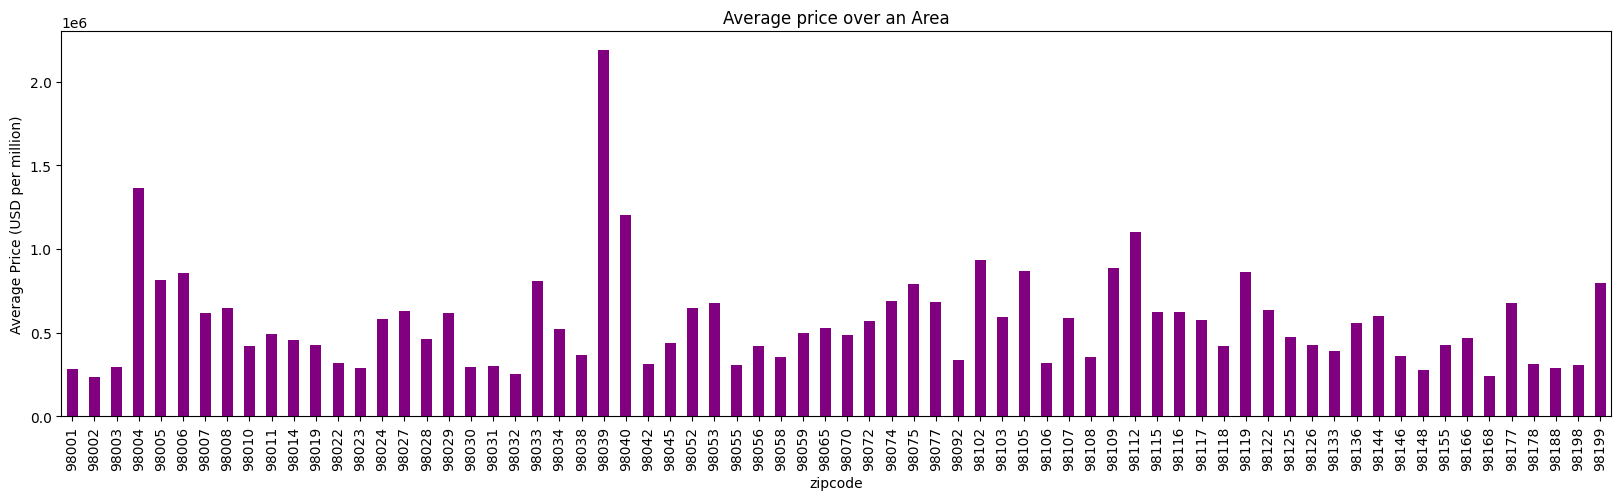

In [17]:

df.groupby('zipcode')['price'].mean().plot(kind = "bar",
                                         xlabel="zipcode",
                                         ylabel="Average Price (USD per million)",
                                         figsize=(20,5),
                                         color = 'purple',
                                         title = "Average price over an Area",
                                         rot = 90)

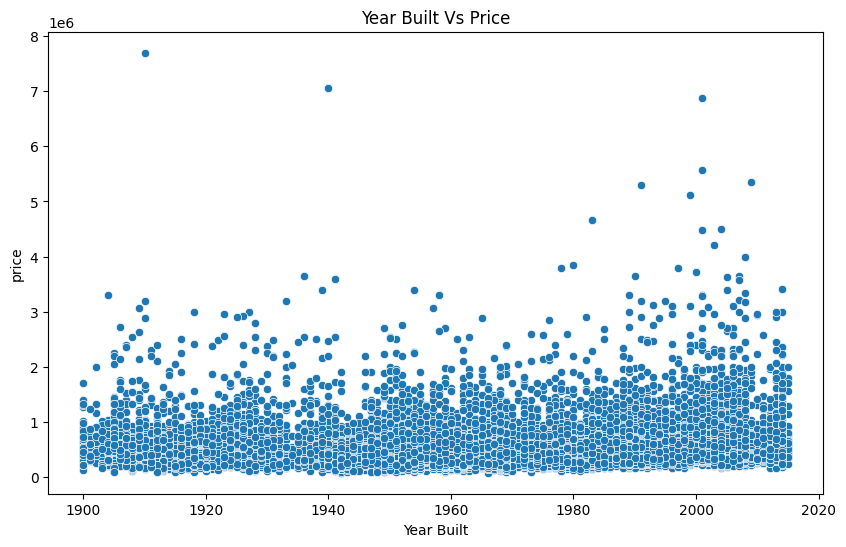

In [18]:
# PRICE VS YEAR BUILT
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x = 'yr_built', y = 'price')
plt.title("Year Built Vs Price")
plt.xlabel('Year Built')
plt.ylabel('price')
plt.show()

Outlier handling

<Axes: >

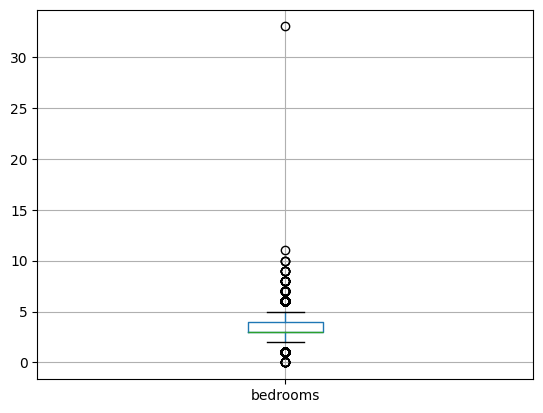

In [19]:
df.boxplot('bedrooms')

In [20]:
df.loc[df['bedrooms'] > 5,'bedrooms'] =df['bedrooms'].mode()[0]
df['bedrooms'].value_counts()

bedrooms
3    9723
4    6735
2    2617
5    1556
1     190
0      11
Name: count, dtype: int64

<Axes: >

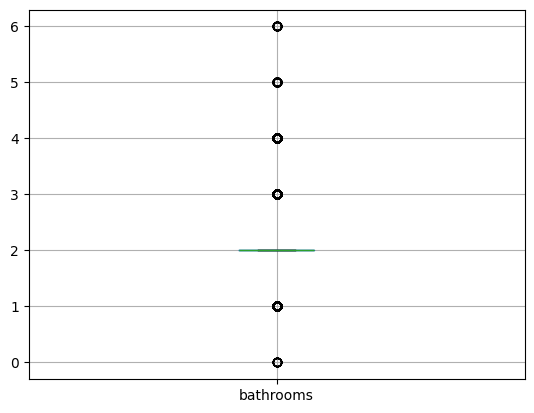

In [51]:
df.boxplot('bathrooms')

In [21]:
#Handling the outliers
df['bathrooms'] = df['bathrooms'].round().astype(int)
df.loc[df['bathrooms'] > 6,'bathrooms'] = df['bathrooms'].mode()[0]
df['bathrooms'].value_counts()

bathrooms
2    13336
1     3775
3     2453
4     1174
5       57
6       24
0       13
Name: count, dtype: int64

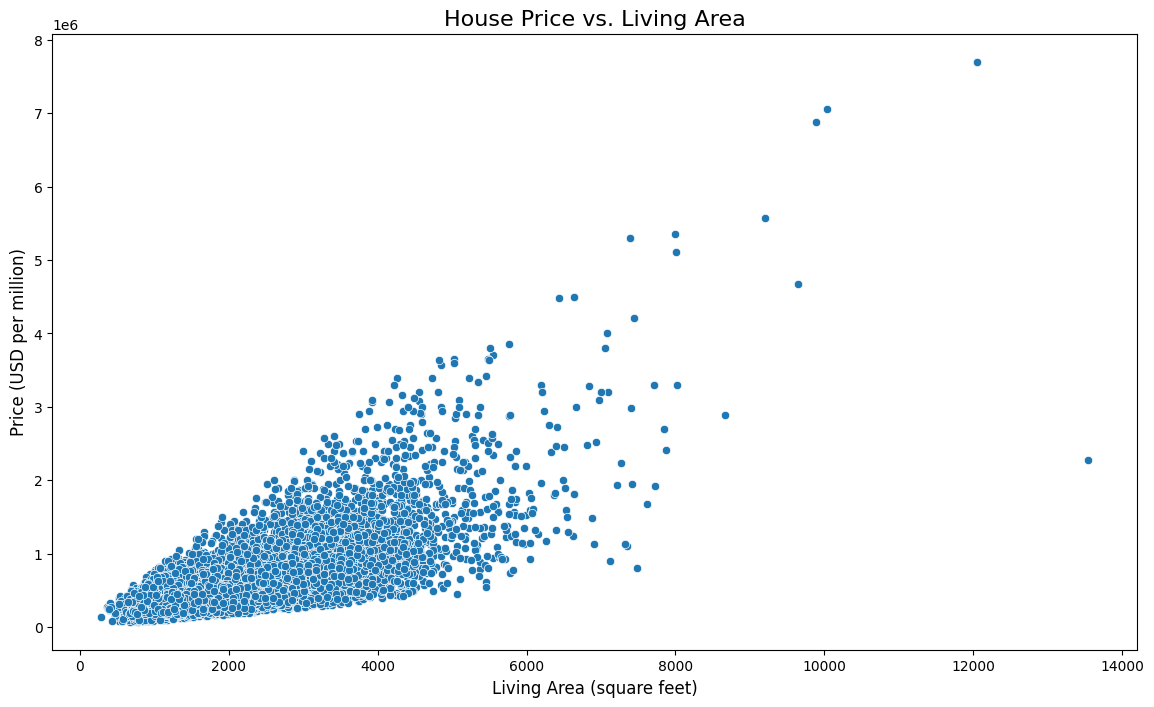

Correlation coefficient between living area and price: 0.70


In [22]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('House Price vs. Living Area', fontsize=16)
plt.xlabel('Living Area (square feet)', fontsize=12)
plt.ylabel('Price (USD per million)', fontsize=12)
plt.show()

# Calculate the correlation coefficient
correlation = df['sqft_living'].corr(df['price'])
print(f"Correlation coefficient between living area and price: {correlation:.2f}")

Feature engineering

In [23]:
#Creating a new column age_house by subtracting yr_built and date sold 
df['date'] =  pd.to_datetime(df['date'])
df['yr_built'] =  pd.to_datetime(df['yr_built'])
df['age_house'] = df['date'].dt.year - df['yr_built'].dt.year 
df['age_house'].describe()

count    20832.000000
mean        44.322101
std          0.467293
min         44.000000
25%         44.000000
50%         44.000000
75%         45.000000
max         45.000000
Name: age_house, dtype: float64

In [24]:
#dropping yr_built and date sold 
df = df.drop(['yr_built','date'],axis = 1)

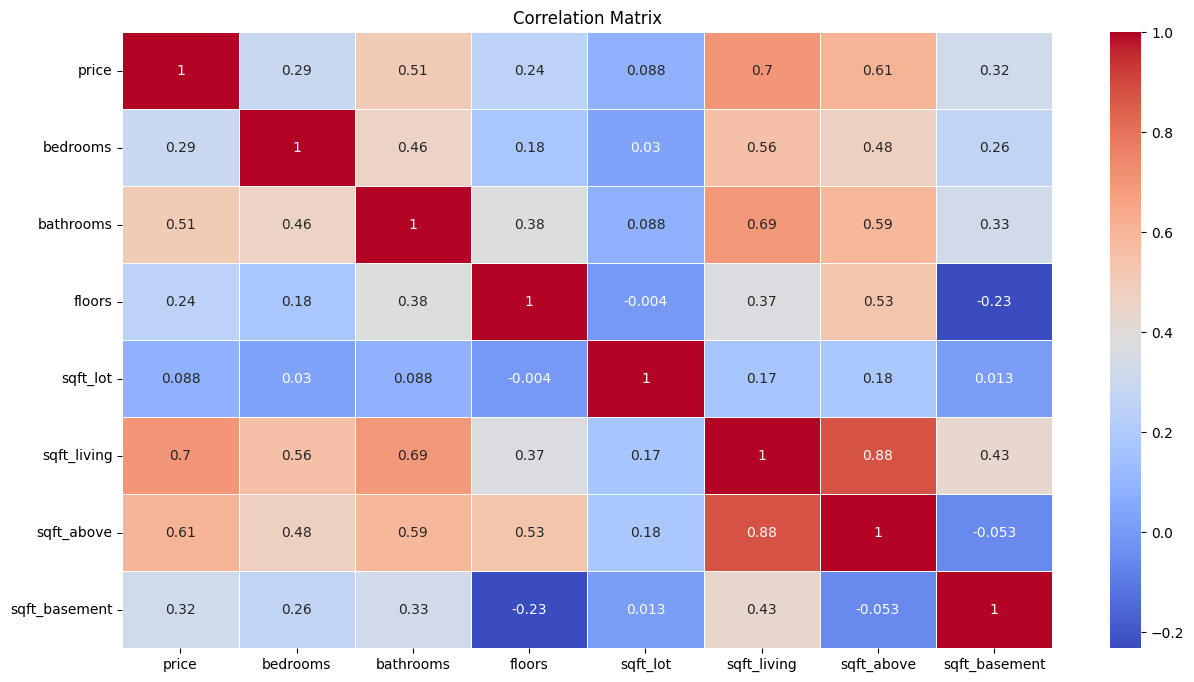

In [25]:
#correlation matrix
corr_features = ['price','bedrooms','bathrooms','floors','sqft_lot','sqft_living','sqft_above','sqft_basement']

correlation_matrix = df[corr_features].corr()

plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Model Development

In [44]:
# splitting the data 
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'age_house',
            'sqft_living15', 'sqft_lot15','zipcode']
x = df[features]
y = df['price']

x_train,x_test,y_train,ytest= train_test_split(x,y,random_state=42,test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [45]:
#RandomForestRegression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg

RandomForestRegressor()

In [46]:
rf_reg.fit(X_train,y_train)

RandomForestRegressor()

In [47]:


train_score = rf_reg.score(X_train,y_train)
print("Train Score : ", train_score)
test_score = rf_reg.score(X_test,ytest)
print("Test Score: ",test_score)



Train Score :  0.9740282270342805
Test Score:  0.8309670216467333


In [48]:
import pickle
with open('model','wb') as file:
    pickle.dump(rf_reg,file)


In [49]:
y_test_predict = rf_reg.predict(X_test)
test_mape = mean_absolute_percentage_error(ytest,y_test_predict)
test_mse =  mean_squared_error(ytest,y_test_predict)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(ytest,y_test_predict)


Results

In [50]:

print("Test Set Results:")
print(f"Root Mean Squared Error: ${test_rmse:,.2f}")
print(f"Mean Absolute Percentage Error: {test_mape:.4f}")
print(f"R-squared Score: {test_r2:.4f}")


Test Set Results:
Root Mean Squared Error: $155,034.70
Mean Absolute Percentage Error: 0.1664
R-squared Score: 0.8310
